The `HexArray` class is a very thin subclass of `numpy.ndarray`, with extra properties indicating which hexagonal coordinate system is being used. Currently two options are implemented, `"offset"` (default) and `"oblique"`. See https://www.redblobgames.com/grids/hexagons/ for a good reference.

In [12]:
from hexfft import HexArray
import numpy as np

# make some test data
data = np.random.normal(size=(8, 6))

# instantiate a HexArray
h = HexArray(data)


By default, `HexArray` assumes the rectangular array comes from data sampled on an offset grid, where every other row is shifted halfway to the right relative to the origin. We can access the `grid` as well as the `pattern` from the instance.

In [13]:
print(h.pattern)
print(h.grid)

offset
(array([[0. , 1. , 2. , 3. , 4. , 5. ],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
       [0. , 1. , 2. , 3. , 4. , 5. ],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
       [0. , 1. , 2. , 3. , 4. , 5. ],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
       [0. , 1. , 2. , 3. , 4. , 5. ],
       [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]]), array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7.]]))


It's more informative to plot the grid.

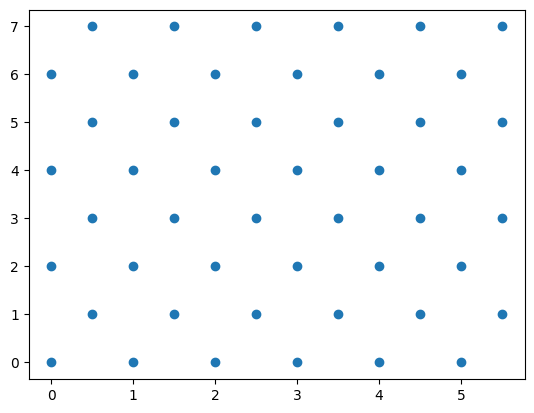

In [14]:
import matplotlib.pyplot as plt
x, y = h.grid
plt.scatter(x, y)

Using `hexfft.plot.hexshow()`, a (much slower and more limited) analog of `plt.matshow`, we can plot our data on this grid:

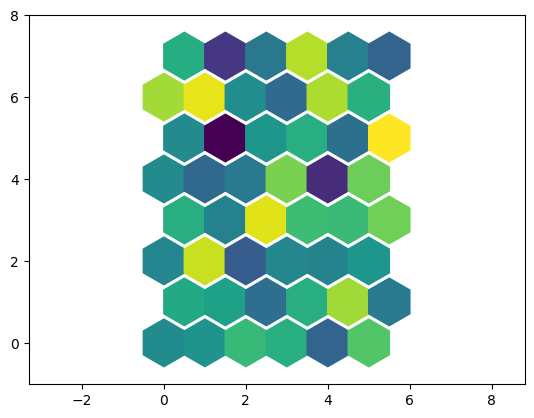

In [17]:
from hexfft.plot import hexshow

hexshow(h)

The next cell gives an example of how to customize plots with `hexshow()`

Text(0.5, 1.0, 'Plotting data on an offset grid')

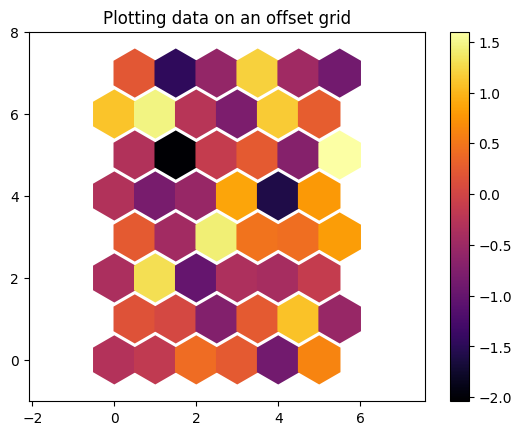

In [19]:
fig, ax = plt.subplots()
im = hexshow(h, ax=ax, cmap="inferno")
fig.colorbar(im)
ax.set_title("Plotting data on an offset grid")

Internally, `hexfft` uses an **oblique** coordinate system to represent hexagonally sampled signals, with a slanted y-axis. Arrays can be input in either format and conversions are taken care of under the hood. Let's look at an oblique grid. The columns of the array represent data points sampled on lines which are skewed relative to the x-axis:

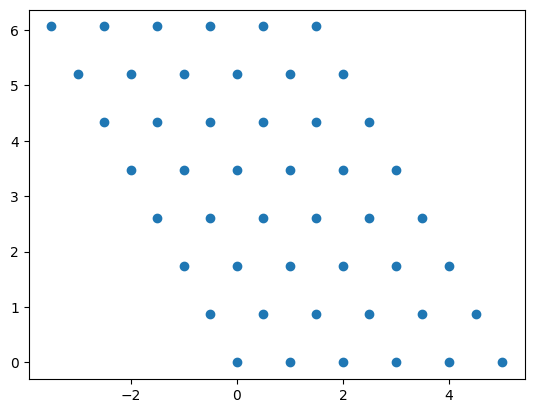

In [24]:
h_obl = HexArray(data, pattern="oblique")
x, y = h_obl.grid
plt.scatter(x, y)

Our data looks like this on an oblique grid:

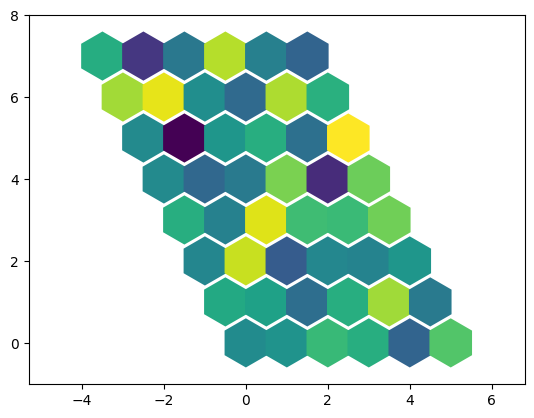

In [25]:
hexshow(h_obl)

Data should be converted into a `HexArray` before passing into the `hexfft` transformations. By default, both the hexagonally periodic and rectangularly periodic transforms assume an `"offset"` coordinate system.

The last special property of a `HexArray` is `indices`, which represent the indices of the array transformed to oblique coordinates for internal use.